## 1. Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pandas import DataFrame


%matplotlib inline
sns.set_style('whitegrid')

## 2. Объединение данных из двух файлов в один датасет 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_norm.csv', index_col=0)

In [ ]:
df

,Прочность при растяжении. МПа,Соотношение матрица-наполнитель,Количество отвердителя. м.%,Содержание эпоксидных групп.%_2,Потребление смолы. г/м2,Угол нашивки. град,Шаг нашивки,Плотность нашивки,модуль упругости. ГПа,Плотность. кг/м3,Температура вспышки. С_2,Поверхностная плотность. г/м2,Модуль упругости при растяжении. ГПа
1,0.698235,0.282131,0.178021,0.506535,0.488979,0.0,0.276998,0.576985,0.385679,0.626533,0.589311,0.149682,0.319194
3,0.698235,0.282131,0.613972,0.373167,0.488979,0.0,0.346248,0.451971,0.385679,0.626533,0.638420,0.149682,0.319194
4,0.698235,0.457857,0.519387,0.427467,0.488979,0.0,0.346248,0.548135,0.393150,0.626533,0.589311,0.149682,0.319194
5,0.698235,0.457201,0.519387,0.427467,0.488979,0.0,0.346248,0.576985,0.390531,0.563509,0.589311,0.149682,0.319194
6,0.698235,0.419084,0.519387,0.427467,0.488979,0.0,0.346248,0.673149,0.421436,0.374437,0.589311,0.149682,0.319194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.480312,0.361750,0.382158,0.313057,0.239516,1.0,0.628535,0.452161,0.476884,0.462855,0.717503,0.149109,0.485125
1019,0.470745,0.587163,0.707685,0.285131,0.220404,1.0,0.731664,0.516890,0.231678,0.668737,0.492271,0.250230,0.475992
1020,0.578340,0.555750,0.512067,0.517605,0.532590,1.0,0.288158,0.650355,0.217065,0.505470,0.473781,0.528643,0.573346
1021,0.368070,0.637396,0.682389,0.266309,0.428909,1.0,0.437186,0.560262,0.387114,0.703842,0.561107,0.458108,0.536217


In [ ]:
X, y  = df.values[:, :-1], df.values[:, -1]
X = X.astype('float32')
X[1]

array([0.6982349 , 0.28213084, 0.6139723 , 0.37316665, 0.48897856,
       0.        , 0.34624788, 0.45197132, 0.38567916, 0.62653327,
       0.6384199 , 0.14968224], dtype=float32)

МОДЕЛИ с Хабра https://habr.com/ru/post/206306/

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from pandas import read_csv, DataFrame
from sklearn.model_selection import train_test_split

In [ ]:
df.rename(columns={'Соотношение матрица-наполнитель': 'X1',
                   'Плотность. кг/м3': 'Y1',
                   'модуль упругости. ГПа':'Y2',
                   'Количество отвердителя. м.%': 'X2',
                   'Содержание эпоксидных групп.%_2':'X3',
                   'Температура вспышки. С_2': 'Y3',
                   'Поверхностная плотность. г/м2': 'Y4',
                   'Модуль упругости при растяжении. ГПа': 'Y5',
                   'Прочность при растяжении. МПа':'Y6',
                   'Потребление смолы. г/м2': 'X4',
                   'Угол нашивки. град': 'X5',
                   'Шаг нашивки': 'X6',
                   'Плотность нашивки':'X7'}, inplace=True)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y6,936.0,0.508836,0.164974,0.075949,0.394824,0.505446,0.611156,0.949223
X1,936.0,0.487527,0.171790,0.030369,0.371473,0.483499,0.606890,0.946640
X2,936.0,0.514179,0.149205,0.115490,0.412683,0.515266,0.619499,0.905499
X3,936.0,0.424329,0.127760,0.076869,0.336971,0.423031,0.517835,0.784214
X4,936.0,0.482711,0.151862,0.078476,0.382591,0.484747,0.584561,0.854149
X5,936.0,0.511752,0.500129,0.000000,0.000000,1.000000,1.000000,1.000000
X6,936.0,0.478901,0.173794,0.002606,0.355596,0.480823,0.594954,0.950963
X7,936.0,0.552481,0.108082,0.262268,0.482837,0.553754,0.623126,0.827131
Y2,936.0,0.385423,0.172180,0.000000,0.259882,0.385679,0.500750,0.862699
Y1,936.0,0.508972,0.148754,0.110749,0.402680,0.515733,0.605859,0.902926


In [ ]:
 #Отделим от нашей выборки прогнозные значения:
trg = df[['Y1','Y2', 'Y3','Y4','Y5','Y6']]
trn = df.drop(['Y1','Y2', 'Y3','Y4','Y5','Y6'], axis=1)


In [ ]:
trg =np.array(trg)
trn=np.array(trn)

In [ ]:
#МОДЕЛИ:
# Метод наименьших квадратов
# Случайный лес
# Метод опорных векторов c линейным ядром
# Метод ближайших соседей

models = [LinearRegression(), # метод наименьших квадратов
	          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
	          KNeighborsRegressor(n_neighbors=3), # метод ближайших соседей
	          SVR(kernel='linear')
           ] # метод опорных векторов с линейным ядром       

In [ ]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.2)

In [ ]:
#создаем временные структуры
TestModels = DataFrame()
tmp = {}
#для каждой модели из списка
for model in models:
 #получаем имя модели
 m = str(model)
 tmp['Model'] = m[:m.index('(')]  
 #для каждого столбца результирующего набора
 for i in range(Ytrn.shape[1]):
  #обучаем модель
  model.fit(Xtrn, Ytrn[:,i]) 
  #вычисляем коэффициент детерминации
  tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest[:,0], model.predict(Xtest))
  #записываем данные и итоговый DataFrame
 TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

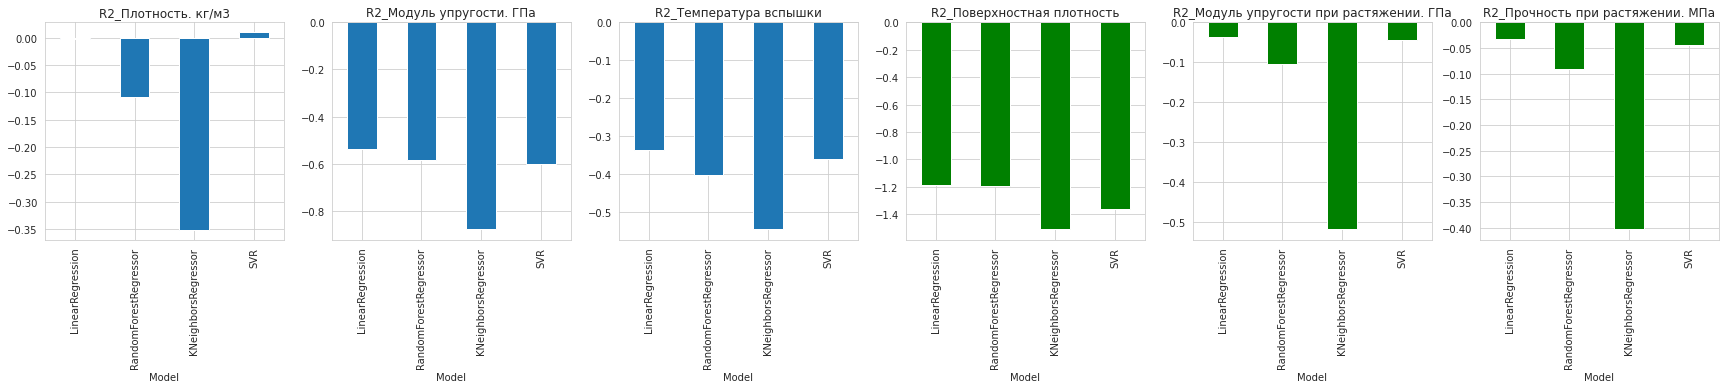

In [ ]:
fig, axes = plt.subplots(ncols=6, figsize=(30,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Плотность. кг/м3')
TestModels.R2_Y2.plot(ax=axes[1], kind='bar', title='R2_Модуль упругости. ГПа')
TestModels.R2_Y3.plot(ax=axes[2], kind='bar', title='R2_Температура вспышки')
TestModels.R2_Y4.plot(ax=axes[3], kind='bar', color='green',title='R2_Поверхностная плотность')
TestModels.R2_Y5.plot(ax=axes[4], kind='bar', color='green',title='R2_Модуль упругости при растяжении. ГПа')
TestModels.R2_Y6.plot(ax=axes[5], kind='bar', color='green',title='R2_Прочность при растяжении. МПа')